In [ ]:
#COMMON IMPORTS
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
from numpy import asarray
from sklearn.datasets import make_regression

#from keras.layers import Dense

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from pandas import read_csv
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
    
#Simple Multiclass classification neural network
#default is three class output and 4 input variables
def get_nn_simpleClassificationmodel(n_inputs=14, n_outputs=6, optimizerinput='adam'):
    # create model
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(1000, activation='relu'))
    
    model.add(layers.Dense(6, activation='softmax'))  # output layer
    #model.compile(loss='mean_squared_error', optimizer=optimizerinput)
    
    #If there are only two classes.
    #model.compile(loss='binary_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    #If there are more than two classes
    model.compile(loss='categorical_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    return model

In [ ]:
#function to return data as X, Y

from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

def getDermatologyData():
    # load dataset
    #df = read_csv("boston_housing.csv", delim_whitespace=True, header=None)
    
    df = pd.read_csv("Feature Selected File.csv")
    
    #DATA CLEANING STEP
    # dropna drops missing values (think of na as "not available")
    df = df.dropna(axis=0)
   
    #Select only numeric columns
    #df_onlyNumeric=df.select_dtypes(include=np.number)
    
    #df=df_onlyNumeric
    
    #dataset = df.values
    X = df.iloc[:, 0:14]
    y=df.iloc[:, 14:15]
    
  # encode class values as integers
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_Y = encoder.transform(y)
    #convert integers to dummy variables (i.e. one hot encoded)
    dummy_y = np_utils.to_categorical(encoded_Y)
    y=dummy_y

    return X,y,df


In [ ]:
#This function returns X,y,dataframe
def getData():
    return getDermatologyData();

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.heatmap(df.isnull(),yticklabels=False,cbar=True)
#plt.show()

In [ ]:
#Test getData function

X,y,df=getData();

print(df.head())
print(X.head())
print(y)


   erythema  scaling  itching  ...  band-like infiltrate   Age  Class Code
0         2        2        3  ...                     0  55.0           2
1         3        3        2  ...                     0   8.0           1
2         2        1        3  ...                     3  26.0           3
3         2        2        0  ...                     0  40.0           1
4         2        3        2  ...                     3  45.0           3

[5 rows x 15 columns]
   erythema  scaling  ...  band-like infiltrate   Age
0         2        2  ...                     0  55.0
1         3        3  ...                     0   8.0
2         2        1  ...                     3  26.0
3         2        2  ...                     0  40.0
4         2        3  ...                     3  45.0

[5 rows x 14 columns]
[[0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c8456f0b8>,
      dtype=object)

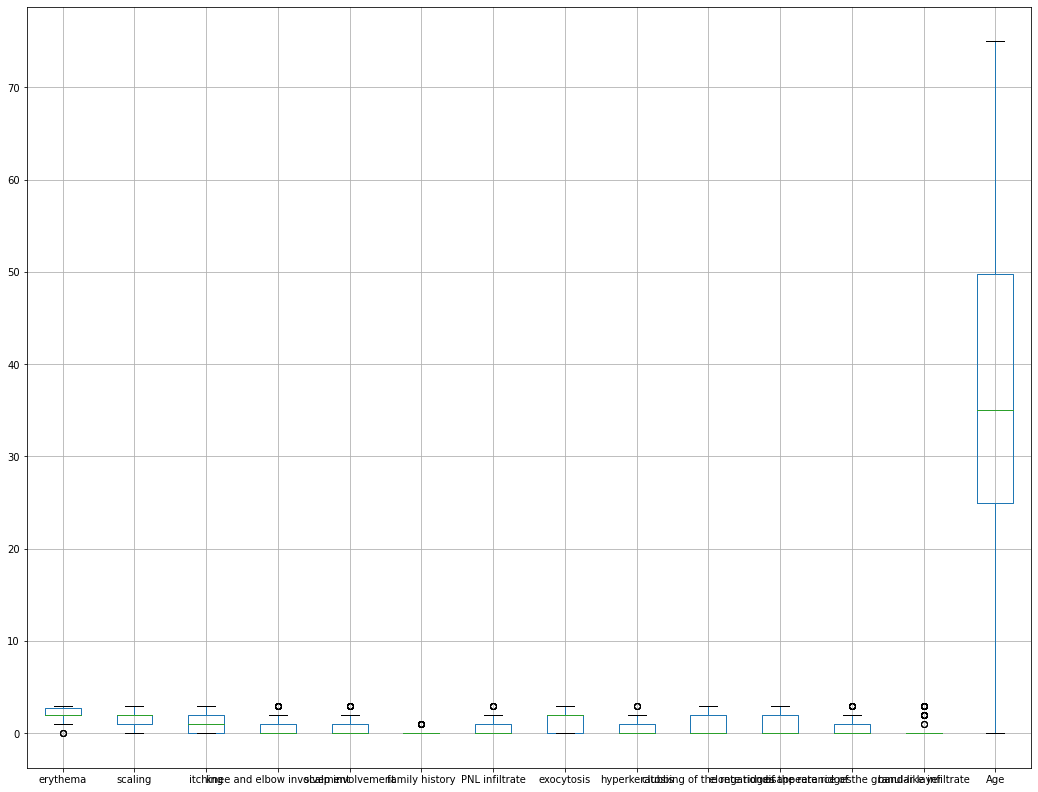

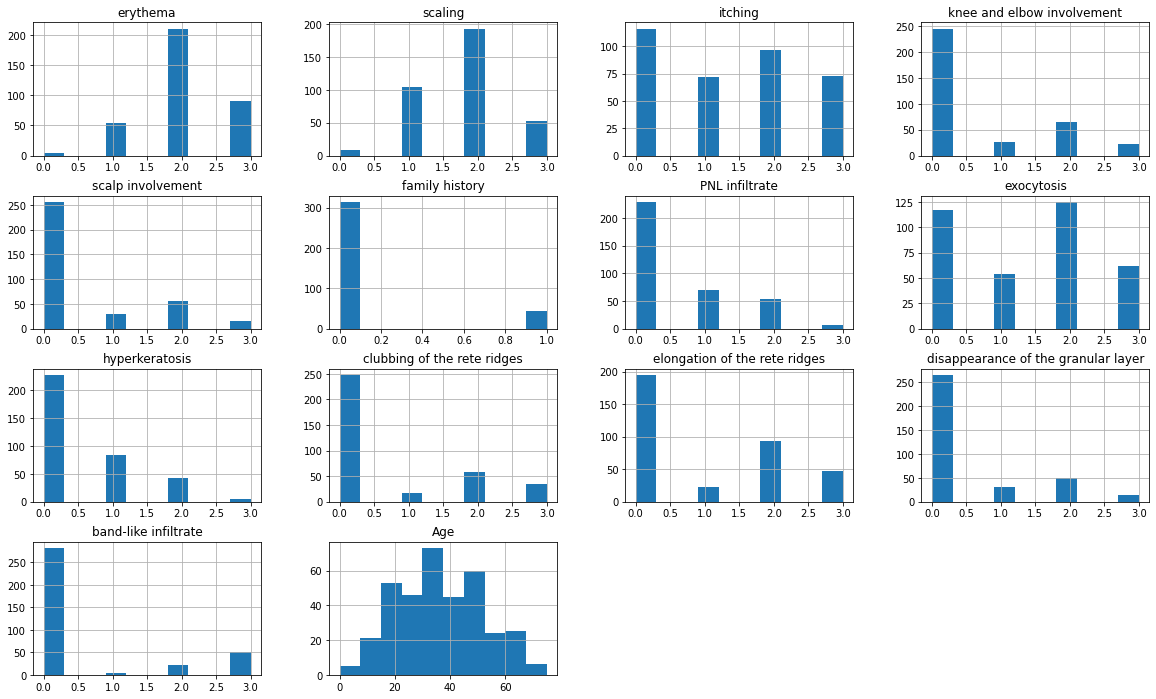

In [ ]:
#Data Exploration

X,y,df=getData();
import seaborn as sns
import matplotlib.pyplot as plt

X.boxplot(figsize=(18,14))
X.hist(figsize=(20,12))

Text(0, 0.5, 'Count')

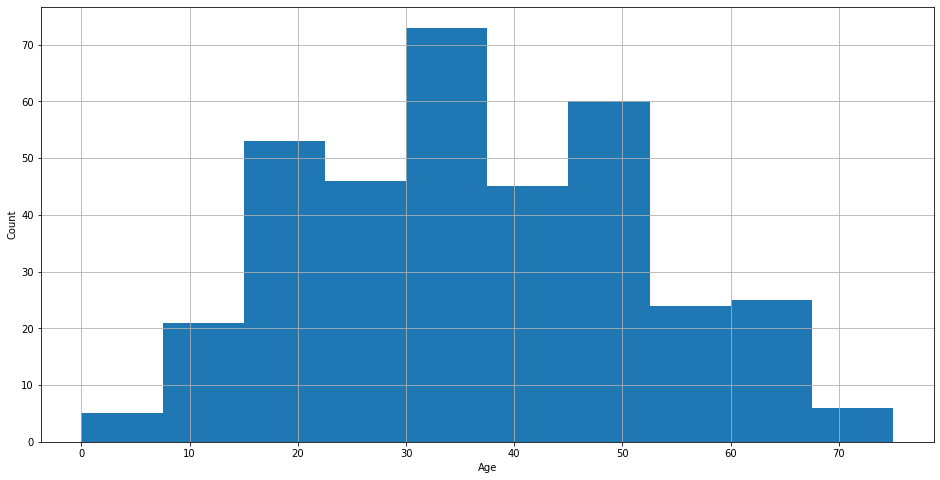

In [ ]:
X['Age'].hist(figsize=(16,8))
plt.xlabel('Age')
plt.ylabel('Count')

In [ ]:
#Data Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#Three datasets

#X_train, y_train
#X_val, y_val
#X_test, y_test

In [ ]:
#Code to run Neuralnetwork using for classification
#using model.fit

from keras.wrappers.scikit_learn import KerasClassifier
from numpy import argmax

model=get_nn_simpleClassificationmodel(n_inputs=len(X.columns), n_outputs=1);
history=model.fit(X_train, y_train, verbose=1, epochs=13, batch_size=20, validation_data=(X_val, y_val))

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Loss is: ',loss)
print('Accuracy of model is: ',acc)

# make a prediction

row = [2,0,0,0,0,1,2,2,1,1,0,0,3,37]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

Epoch 1/13
12/12 [==============================] - 1s 23ms/step - loss: 1.7213 - accuracy: 0.2516 - val_loss: 1.5469 - val_accuracy: 0.3103
Epoch 2/13
12/12 [==============================] - 0s 6ms/step - loss: 1.5527 - accuracy: 0.3252 - val_loss: 1.4392 - val_accuracy: 0.3103
Epoch 3/13
12/12 [==============================] - 0s 7ms/step - loss: 1.4392 - accuracy: 0.4105 - val_loss: 1.2923 - val_accuracy: 0.5000
Epoch 4/13
12/12 [==============================] - 0s 6ms/step - loss: 1.2439 - accuracy: 0.5231 - val_loss: 1.1321 - val_accuracy: 0.6552
Epoch 5/13
12/12 [==============================] - 0s 6ms/step - loss: 1.1603 - accuracy: 0.6126 - val_loss: 1.0024 - val_accuracy: 0.5517
Epoch 6/13
12/12 [==============================] - 0s 6ms/step - loss: 0.9835 - accuracy: 0.5653 - val_loss: 0.9148 - val_accuracy: 0.6034
Epoch 7/13
12/12 [==============================] - 0s 7ms/step - loss: 0.8732 - accuracy: 0.6614 - val_loss: 0.7803 - val_accuracy: 0.7586
Epoch 8/13
12/12 [=

   loss_train  loss_val  diff_in_loss
0    1.667463  1.512656      0.154807
1    1.478694  1.350642      0.128053
2    1.307238  1.158975      0.148263
3    1.116647  0.983967      0.132680
4    0.957071  0.862129      0.094942
5    0.832713  0.769581      0.063132
6    0.740599  0.678545      0.062054
7    0.648993  0.605970      0.043023
8    0.563079  0.543261      0.019818
9    0.490815  0.512638      0.021823


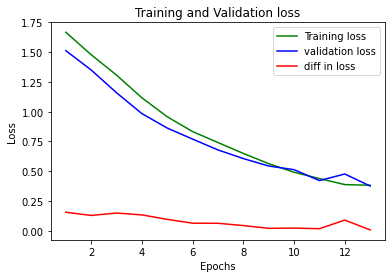

In [ ]:
# Code to create graph for train vs validation error for different epochs

loss_train = history.history['loss']
loss_val = history.history['val_loss']

diff_in_loss=abs(np.subtract(loss_val,loss_train));

df = pd.DataFrame({'loss_train':loss_train, 'loss_val':loss_val, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(1,len(loss_train)+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'train_vs_Validation_loss_'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)
plt.savefig(fileName+'.jpg',format='jpg', dpi=2000)

df.to_excel("neural_network_train_vs_val_loss"+timeStr+".xlsx", sheet_name='TrainvsValLoss')

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=get_nn_simpleClassificationmodel, n_inputs=14, epochs=100, batch_size=50, n_outputs=6, verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f4c7f93df60>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40, 60, 80, 100],
                         'epochs': [10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
Best: 0.930275 using {'batch_size': 10, 'epochs': 50}
0.818324 (0.067924) with: {'batch_size': 10, 'epochs': 10}
0.930275 (0.038711) with: {'batch_size': 10, 'epochs': 50}
0.910644 (0.010185) with: {'batch_size': 10, 'epochs': 100}
0.815686 (0.062740) with: {'batch_size': 20, 'epochs': 10}
0.921895 (0.034165) with: {'batch_size': 20, 'epochs': 50}
0.924603 (0.031382) with: {'batch_size': 20, 'epochs': 100}
0.617507 (0.060850) with: {'batch_size': 40, 'epochs': 10}
0.910644 (0.021917) with: {'batch_size': 40, 'epochs': 50}
0.919024 (0.021928) with: {'batch_size': 40, 'epoc

In [ ]:
#Hyperparameter Tuning to Tune Optimization Algorithm

from sklearn.model_selection import GridSearchCV

# create model
model = KerasClassifier(build_fn=get_nn_simpleClassificationmodel, n_inputs=len(X.columns), epochs=50, batch_size=20, n_outputs=6, verbose=0)
#model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.924627 using {'optimizerinput': 'Nadam'}
0.916270 (0.029654) with: {'optimizerinput': 'RMSprop'}
0.463796 (0.052360) with: {'optimizerinput': 'Adagrad'}
0.254365 (0.065363) with: {'optimizerinput': 'Adadelta'}
0.913469 (0.025717) with: {'optimizerinput': 'Adam'}
0.879972 (0.043281) with: {'optimizerinput': 'Adamax'}
0.924627 (0.017918) with: {'optimizerinput': 'Nadam'}


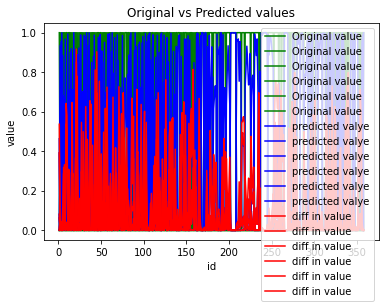

ValueError: ignored

In [ ]:
#code to print actual, predicted, diff in values


predicted=model.predict(X)
actual=y;

#y_flat=actual.values.flatten();

#predicted_flat=predicted.flatten()

residue=abs(np.subtract(actual,predicted))

#Plot
xasix = range(1,len(y)+1)

plt.plot(xasix, y, 'g', label='Original value')
plt.plot(xasix, predicted, 'b', label='predicted valye')
plt.plot(xasix, residue, 'r', label='diff in value')

plt.title('Original vs Predicted values')
plt.xlabel('id')
plt.ylabel('value')
plt.legend()

timeStr=datetime.now().strftime("%Y%m%d-%H%M%S");
fileName = 'Original_vs_Predicted_y'+timeStr

plt.savefig(fileName+'.png',format='png', dpi=2000)
plt.savefig(fileName+'.jpg',format='jpg', dpi=2000)

plt.show()

#Write to file
#df = pd.DataFrame({'y1':y, 'pred':predicted, 'residue':residue})

df.to_excel("neural_network_output"+timeStr+".xlsx", sheet_name='Sheet_name_1')

#Data frame to include all X,y, predicted y and difference between actual y and predicted y
masterdf = Xnew.merge(df,left_index=True, right_index=True)
masterdf.to_excel("master_analysis_"+timeStr+".xlsx", sheet_name='Sheet_name_1')

In [ ]:
#user input to check the output class. 
erythmea=float(input('enter erythmea level 0-3: '))
scaling=float(input('etner scaling level 0-3: '))
itching=float(input('enter itching level 0-3: '))
knee_elbow_involvment=float(input('enter knee elbow involvment level 0-3: '))
scalp_involvment=float(input('enter the scalp involvment level 0-3: '))
family_history=float(input('enter family history 0 or 1? '))
pnl_infiltrate=float(input('enter pnl infiltrate level 0-3: '))
exocytosis=float(input('enter exocytosis level: 0-3 '))
hyperkeratosis=float(input('enter hyperkeratosis level: 0-3 '))
clubbing=float(input('how much clubbing involved? 0-3'))
elongation=float(input('enter elongation level: 0-3'))
granular_layer_disappeared=float(input('enter a disappearance level: 0-3 '))
band_infiltrate=float(input('enter band infiltrate level: 0-3 '))
age=float(input('enter age of patient: '))
input_data = [erythmea,scaling,itching,knee_elbow_involvment,scalp_involvment,family_history,pnl_infiltrate,exocytosis,hyperkeratosis,clubbing,elongation,granular_layer_disappeared,band_infiltrate,age]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))

enter erythmea level 0-3: 1
etner scaling level 0-3: 1
enter itching level 0-3: 2
enter knee elbow involvment level 0-3: 3
enter the scalp involvment level 0-3: 1
enter family history 0 or 1? 1
enter pnl infiltrate level 0-3: 3
enter exocytosis level: 0-3 0
enter hyperkeratosis level: 0-3 2
how much clubbing involved? 0-33
enter elongation level: 0-31
enter a disappearance level: 0-3 1
enter band infiltrate level: 0-3 0
enter age of patient: 30
Predicted: [[0.02035973 0.11983984 0.45578945 0.08555477 0.3165266  0.00192965]] (class=2)


In [ ]:
11